# 0.0 Imports

In [33]:
from sklearn import datasets as ds
from sklearn import cluster as ct
from sklearn import metrics as mt

from matplotlib import pyplot as plt
import numpy as np

# 1.0 Loading Dataset

In [40]:
# blobs é um tipo de cluster, a função 'make_blobs()' retorna um conjunto de dados 'X' contendo datapoints que
# serão usados para estudar clusterização e uma array 'y' contendo a informação de qual cluster cada datapoint
# presente em 'X' pertence

X, y = ds.make_blobs(
    
                n_samples=100,      # número de pontos
                n_features=2,       # número de colunas (features)
                centers=4,          # número de clusters naturais
                cluster_std=0.2,    # largura do cluster 
                random_state=0
             )

In [41]:
X.shape

(100, 2)

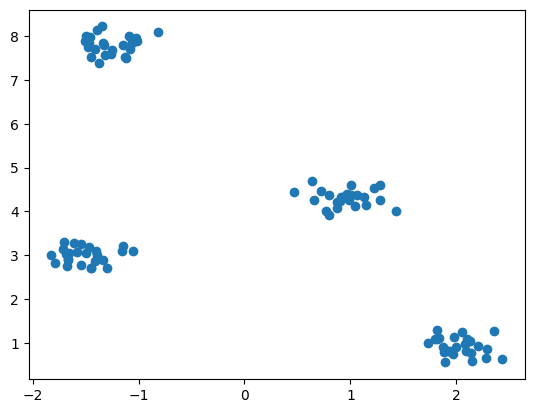

In [42]:
plt.scatter(X[:, 0], X[:, 1])

# 2.0 Training Model

In [53]:
K = 4  # número de clusters

# definindo o modelo
kmeans = ct.KMeans(
    
                n_clusters=K,       # numero de cluster que achamos que dataset possui 
                init='random',      # modo de inicializacao dos centroides
                n_init=10,          # numero de vezes que o algoritmo é inicializado com diferentes centroides
                random_state=0      # seed de dados aleatórios
        )

# treinando o modelo
labels = kmeans.fit_predict(X)

# performance
ss_avg = mt.silhouette_score(X, labels)

In [54]:
print(f'For n_clusters = {K} - Avg SS: {ss_avg}')

For n_clusters = 4 - Avg SS: 0.8877551451876332


In [55]:
# o objeto kmeans possui um atributo chamado 'labels' que depois de treinado nos retorna uma array
# com os rótulos de cada cluster atribuido pelo kmeans.
kmeans.labels_

array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2], dtype=int32)

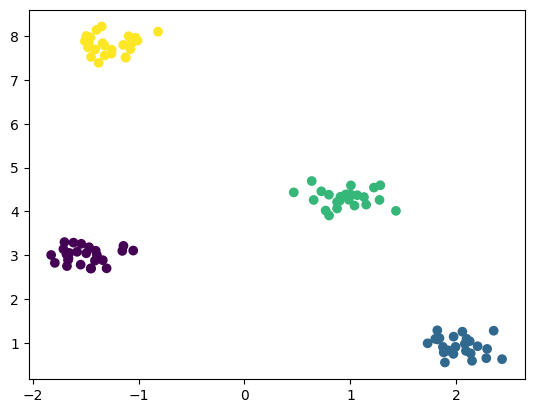

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

# 3.0 Fine Tunning

In [57]:
K_array = np.arange(2, 11, 1)  # array com diferente número de clusters

ss_list = []
for c in K_array:
    
    # define
    kmeans = ct.KMeans(

                    n_clusters=c,       # numero de cluster que achamos que dataset possui 
                    init='random',      # modo de inicializacao dos centroides
                    n_init=10,          # numero de vezes que o algoritmo é inicializado com diferentes centroides
                    random_state=0      # seed de dados aleatórios
            )

    # fit (training)
    labels = kmeans.fit_predict(X)

    # performance (test)
    ss_avg = mt.silhouette_score(X, labels)
    ss_list.append(ss_avg)
    
    print(f'For n_clusters = {c} - Avg SS: {ss_avg}')

For n_clusters = 2 - Avg SS: 0.6301533356400746
For n_clusters = 3 - Avg SS: 0.7446117253423215
For n_clusters = 4 - Avg SS: 0.8877551451876332
For n_clusters = 5 - Avg SS: 0.749445213898992
For n_clusters = 6 - Avg SS: 0.5987300721165134
For n_clusters = 7 - Avg SS: 0.4568675319876359
For n_clusters = 8 - Avg SS: 0.4862682155094882
For n_clusters = 9 - Avg SS: 0.3429962418990516
For n_clusters = 10 - Avg SS: 0.3561834879825588


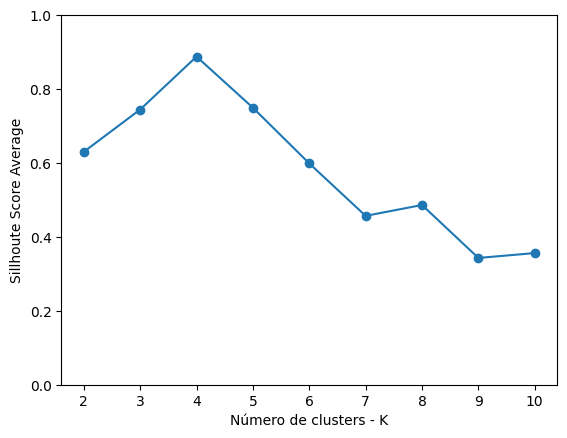

In [58]:
plt.plot(K_array, ss_list, marker='o')
plt.ylim(0, 1)

plt.xlabel('Número de clusters - K')
plt.ylabel('Sillhoute Score Average')

plt.show()

# 4.0 Algoritmo em Produção

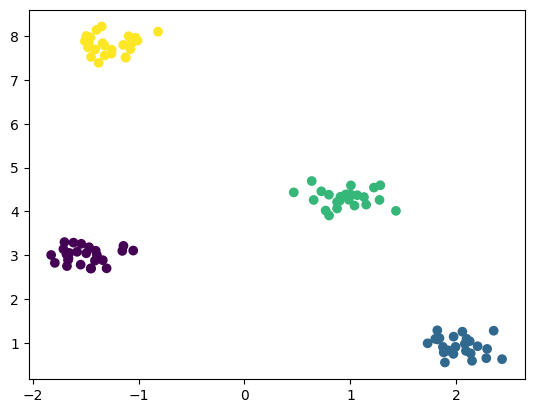

In [59]:
K = 4  # número de clusters

# definindo o modelo
kmeans = ct.KMeans(
    
                n_clusters=K,       # numero de cluster que achamos que dataset possui 
                init='random',      # modo de inicializacao dos centroides
                n_init=10,          # numero de vezes que o algoritmo é inicializado com diferentes centroides
                random_state=0      # seed de dados aleatórios
        )

# treinando o modelo
labels = kmeans.fit_predict(X)

# performance
ss_avg = mt.silhouette_score(X, labels)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)